In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df= pd.read_csv('/content/Iris.csv')
x = df.iloc[:, : -1].values 
y = df.iloc[:, -1].values 

In [24]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df = df.drop(columns= ['Id']) # Delete the column

In [29]:
df.head() 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [30]:
# To display stats about Data
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [32]:
df.info() #display basic info about datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [33]:
# To display no. of samples on each class
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# Preprocessing

In [34]:
# Check for null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# EDA - Exploratory Data Analysis

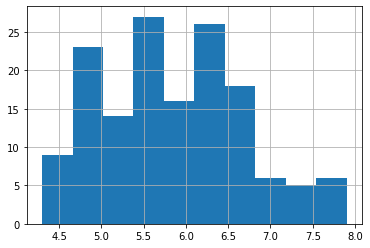

In [35]:
df['SepalLengthCm'].hist()

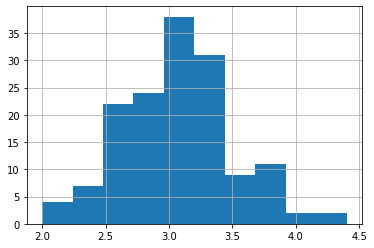

In [36]:
df['SepalWidthCm'].hist()

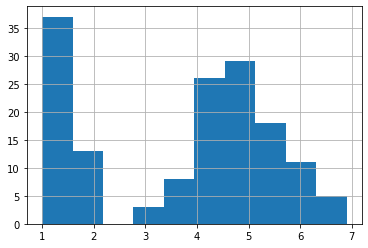

In [37]:
df['PetalLengthCm'].hist()

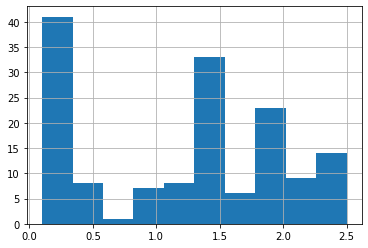

In [38]:
df['PetalWidthCm'].hist()

In [40]:
# Scatter Plot
colors = ['red', 'orange', 'blue']
species = [ 'Iris-virginica', 'Iris-versicolor','Iris-setosa']

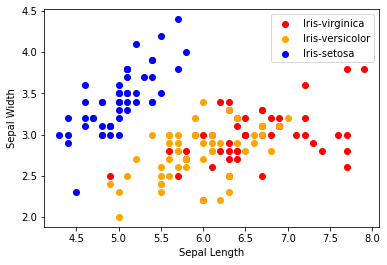

In [42]:
for i in range(3):
  x = df[df['Species'] == species[i]]
  plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label = species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width') 
plt.legend() 

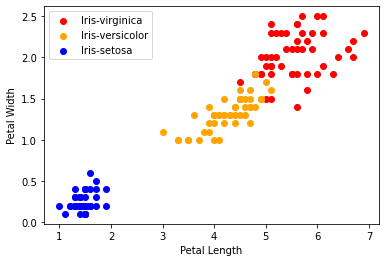

In [44]:
for i in range(3):
  x = df[df['Species'] == species[i]]
  plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label = species[i])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width') 
plt.legend() 

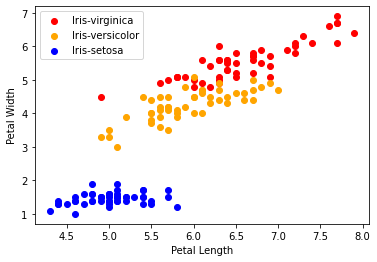

In [45]:
for i in range(3):
  x = df[df['Species'] == species[i]]
  plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label = species[i])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width') 
plt.legend() 

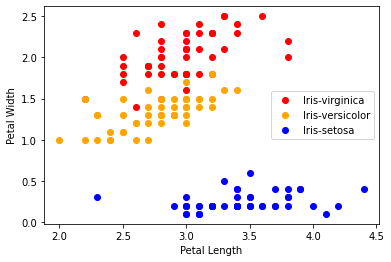

In [47]:
for i in range(3):
  x = df[df['Species'] == species[i]]
  plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label = species[i])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width') 
plt.legend() 

# Coorelation Matrix
A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1. If two varibles have high correlation, we can neglect one variable from those two.

In [48]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


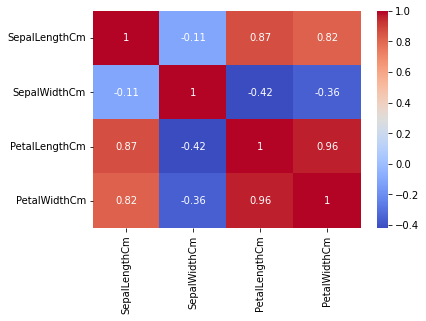

In [56]:
corr = df.corr()
sns.heatmap(corr, annot = True, cmap = 'coolwarm') # cmap = RdBu, coolwarm (Colors)

#Label Encoder
In machine learning, we usually deal with datasets which contains multiple labels in one or more than one columns. These labels can be in the form of words or numbers. Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form

In [58]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [61]:
df['Species'] = le.fit_transform(df['Species'])

In [62]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#Model Train

In [111]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Species'])
Y = df['Species']
x_train,x_test,y_train, y_test = train_test_split(X, Y, test_size = 0.4)

In [116]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [117]:
model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [118]:
y_pred = model.predict(x_test)

In [119]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print('Accuracy:',accuracy_score(y_test, y_pred)* 100)

[[19  0  0]
 [ 0 16  0]
 [ 0  6 19]]
Accuracy: 90.0


In [120]:
# Print Matrix to get performance
print('accuacy:', model.score(x_test, y_test) * 100)

accuacy: 90.0


In [121]:
# Knn - K-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [122]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [123]:
y_pred_Knn = model.predict(x_test)

In [124]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred_Knn))
print('Accuracy:', accuracy_score(y_test, y_pred_Knn)* 100)

[[19  0  0]
 [ 0 16  0]
 [ 0  5 20]]
Accuracy: 91.66666666666666


In [112]:
# Decision Tree 
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [113]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [114]:
y_pred_tree = model.predict(x_test)

In [115]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred_tree))
print('Accuracy:', accuracy_score(y_test, y_pred_tree)* 100)

[[19  0  0]
 [ 0 15  1]
 [ 0  4 21]]
Accuracy: 91.66666666666666
